In [37]:
# Steps to follow while performing the Linear Regression

# Step 1 -> Include the columns that are only required.
# Step 2 -> Identify the target variable that u want to choose
# Step 3 -> Partitioning the dataset, 60 and 40 
# Step 4 -> Run the Linear Regression Model
# Step 5 -> Get the Coefficients
# Step 6 -> Get the Statistical Summary

In [81]:
#These libraries are required for the Multiple Linear regression methods

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
%matplotlib inline

In [3]:
df_toyota = pd.read_csv("ToyotaCorolla.csv")

In [4]:
df_toyota.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [5]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model              1436 non-null   object
 1   price              1436 non-null   int64 
 2   age_08_04          1436 non-null   int64 
 3   mfg_month          1436 non-null   int64 
 4   mfg_year           1436 non-null   int64 
 5   km                 1436 non-null   int64 
 6   fuel_type          1436 non-null   object
 7   hp                 1436 non-null   int64 
 8   met_color          1436 non-null   int64 
 9   color              1436 non-null   object
 10  automatic          1436 non-null   int64 
 11  cc                 1436 non-null   int64 
 12  doors              1436 non-null   int64 
 13  cylinders          1436 non-null   int64 
 14  gears              1436 non-null   int64 
 15  quarterly_tax      1436 non-null   int64 
 16  weight             1436 non-null   int64 


In [17]:
# When selecting the columns u just need to write the names of the columns that u need into the 
# List and nothing else and then pass that directly into the Data Frame that u are working with.

columns_include = ["price", "age_08_04", "km", "fuel_type", "hp", "met_color", "automatic", "cc", "doors", "quarterly_tax", "weight"]
df_work = df_toyota[columns_include]

In [16]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          1436 non-null   int64 
 1   age_08_04      1436 non-null   int64 
 2   km             1436 non-null   int64 
 3   fuel_type      1436 non-null   object
 4   hp             1436 non-null   int64 
 5   met_color      1436 non-null   int64 
 6   automatic      1436 non-null   int64 
 7   cc             1436 non-null   int64 
 8   doors          1436 non-null   int64 
 9   quarterly_tax  1436 non-null   int64 
 10  weight         1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [23]:
# Now we will select the first 1000 rows for data prep

df_car = df_work.iloc[0:1000]

# Selecting the predictors
predictors = ["age_08_04", "km", "fuel_type", "hp", "met_color", "automatic", "cc", "doors", "quarterly_tax", "weight"]

# Selecting the Outcome variable
outcome = "price"

In [30]:
# Partitioning data 

X = pd.get_dummies(df_car[predictors], drop_first = True)
y = df_car[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, train_size = 0.6, random_state = 1)

In [32]:
# Linear Model

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

In [33]:
# Print Coefficients
print(pd.DataFrame({
    'Predictor' : X.columns,
    'coefficients' : car_lm.coef_
}))

           Predictor  coefficients
0          age_08_04   -140.748761
1                 km     -0.017840
2                 hp     36.103419
3          met_color     84.281830
4          automatic    416.781954
5                 cc      0.017737
6              doors    -50.657863
7      quarterly_tax     13.625325
8             weight     13.038711
9   fuel_type_Diesel   1066.464681
10  fuel_type_Petrol   2310.249543


In [38]:
# Print Performance (training data)
regressionSummary(train_y, car_lm.predict(train_X))

# train_X contains all the input features (like price, age, km, etc.) 
# that we use to make predictions


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [71]:
''' 
train_X:
Contains the FEATURES for training (like age, mileage, fuel_type, etc.)
Usually about 60-80% of your total data
Used to train the model
Example shape might be like (600 rows, 10 features)


train_y:
Contains only the TARGET variable (price) for training data
Corresponds to the same rows as train_X
Example shape would be (600 rows, 1 column)


valid_X:
Contains the same FEATURES as train_X but for validation
Usually about 20-40% of your total data
Used to test how well your model performs on unseen data
Example shape might be like (400 rows, 10 features)


valid_y:
Contains the TARGET variable (price) for validation data
Corresponds to the same rows as valid_X
Example shape would be (400 rows, 1 column)
'''

' \ntrain_X:\nContains the FEATURES for training (like age, mileage, fuel_type, etc.)\nUsually about 60-80% of your total data\nUsed to train the model\nExample shape might be like (600 rows, 10 features)\n\n\ntrain_y:\nContains only the TARGET variable (price) for training data\nCorresponds to the same rows as train_X\nExample shape would be (600 rows, 1 column)\n\n\nvalid_X:\nContains the same FEATURES as train_X but for validation\nUsually about 20-40% of your total data\nUsed to test how well your model performs on unseen data\nExample shape might be like (400 rows, 10 features)\n\n\nvalid_y:\nContains the TARGET variable (price) for validation data\nCorresponds to the same rows as valid_X\nExample shape would be (400 rows, 1 column)\n'

In [78]:
# Make predictions
car_lm_predict = car_lm.predict(valid_X)

# Create DataFrame
results = pd.DataFrame({
    'Predictions': car_lm_predict,
    'Actual Values': valid_y,
    'Residuals': valid_y - car_lm_predict
})

# Add percent column after DataFrame is created
results['Percent'] = (results['Residuals'] / results['Actual Values']) * 100

# Print results
print(results.head(10))

# Print regression metrics
regressionSummary(valid_y, car_lm_predict)

      Predictions  Actual Values    Residuals    Percent
507  10607.333940          11500   892.666060   7.762314
818   9272.705792           8950  -322.705792  -3.605651
452  10617.947808          11450   832.052192   7.266831
368  13600.396275          11450 -2150.396275 -18.780753
242  12396.694660          11950  -446.694660  -3.738031
929   9496.498212           9995   498.501788   4.987512
262  12480.063217          13500  1019.936783   7.555087
810   8834.146068           7950  -884.146068 -11.121334
318  12183.361282           9900 -2283.361282 -23.064255
49   19206.965683          21950  2743.034317  12.496739

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


 The percent of variables in the range of +-1406 is : 74.25 %


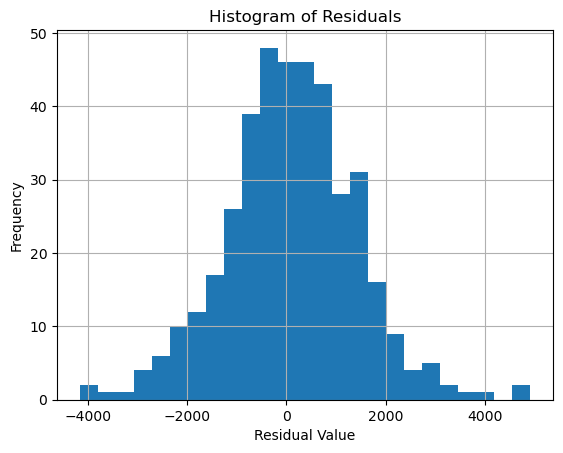

In [88]:
# Make predictions
car_lm_pred = car_lm.predict(valid_X)

# Calculate residuals
all_residuals = valid_y - car_lm_pred

# Calculate percentage of residuals within range
print(" The percent of variables in the range of +-1406 is :", len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals)*100, "%")

# Using pandas hist()
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()